In [1]:
import pandas as pd
import seaborn as sns; sns.set_theme(color_codes=True)
import matplotlib.pyplot as plt

In [ ]:
# Configuration to set so that all the Seaborn figs come out with this size
sns.set_context("poster")
sns.set(rc={"figure.figsize": (16.,8.)})
sns.set_style("whitegrid")

## Loading the data 

In [5]:
df_merged = pd.read_csv(r"C:\Users\rapha\OneDrive\ironhack\projects\Project_Final_Ironhack\cleaned_data\df_merged_quandl.csv") # open the dataframe
df_merged['Date'] = df_merged["Date"].astype('datetime64[ns]') # change the date from object to datatime - important for visalization
df_merged

,Date,M2,S&P 500,CPI,RE Loan,Initial Claims,Revolving Credit,PMI
0,1871-01-01,NaN,105.76,NaN,NaN,NaN,NaN,NaN
1,1871-02-01,NaN,104.02,NaN,NaN,NaN,NaN,NaN
2,1871-03-01,NaN,105.01,NaN,NaN,NaN,NaN,NaN
3,1871-04-01,NaN,112.01,NaN,NaN,NaN,NaN,NaN
4,1871-05-01,NaN,117.56,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
1845,2022-09-01,21459.5,3850.52,296.808,248786.1,NaN,NaN,NaN
1846,2022-09-01,21459.5,3585.62,296.808,248786.1,NaN,NaN,NaN
1847,2022-10-01,21362.5,3726.05,298.012,250692.6,NaN,NaN,NaN
1848,2022-10-01,21362.5,3871.98,298.012,250692.6,NaN,NaN,NaN


In [12]:
df_merged_2 = pd.read_csv(r"C:\Users\rapha\OneDrive\ironhack\projects\Project_Final_Ironhack\cleaned_data\df_merged_2_quandl.csv") # open the dataframe
df_merged_2['Date'] = df_merged_2["Date"].astype('datetime64[ns]') # change the date from object to datatime - important for visalization
df_merged_2

,Date,S&P 500,GDP,Cons. Sent.,US Big Mac
0,1871-01-01,105.76,NaN,NaN,NaN
1,1871-02-01,104.02,NaN,NaN,NaN
2,1871-03-01,105.01,NaN,NaN,NaN
3,1871-04-01,112.01,NaN,NaN,NaN
4,1871-05-01,117.56,NaN,NaN,NaN
...,...,...,...,...,...
1845,2022-09-01,3850.52,NaN,58.6,NaN
1846,2022-09-01,3585.62,NaN,58.6,NaN
1847,2022-10-01,3726.05,NaN,NaN,NaN
1848,2022-10-01,3871.98,NaN,NaN,NaN


## First Visalization 

[Text(0.5, 1.0, 'Consumer Price Index')]

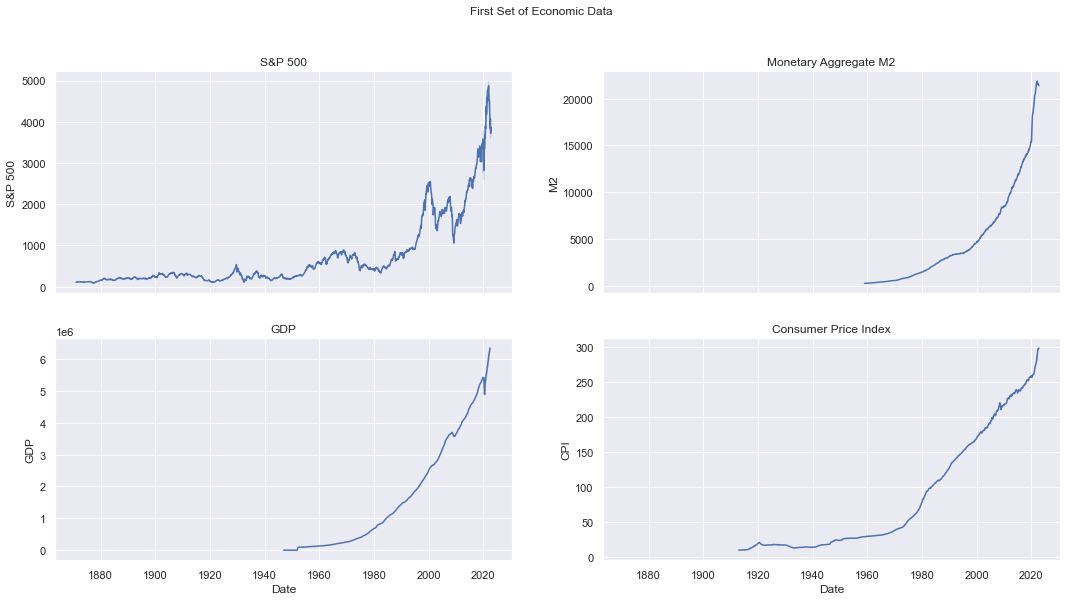

In [17]:
figure, axes = plt.subplots(2, 2, sharex=True, figsize=(18,9))
figure.suptitle('First Set of Economic Data')

sns.lineplot(ax=axes[0, 0], data=df_merged, x='Date', y='S&P 500').set(title='S&P 500')
sns.lineplot(ax=axes[0, 1], data=df_merged, x='Date', y='M2').set(title='Monetary Aggregate M2')
sns.lineplot(ax=axes[1, 0], data=df_merged_2, x='Date', y='GDP').set(title='GDP')
sns.lineplot(ax=axes[1, 1], data=df_merged, x='Date', y='CPI').set(title='Consumer Price Index')

[Text(0.5, 1.0, 'US Big Mac')]

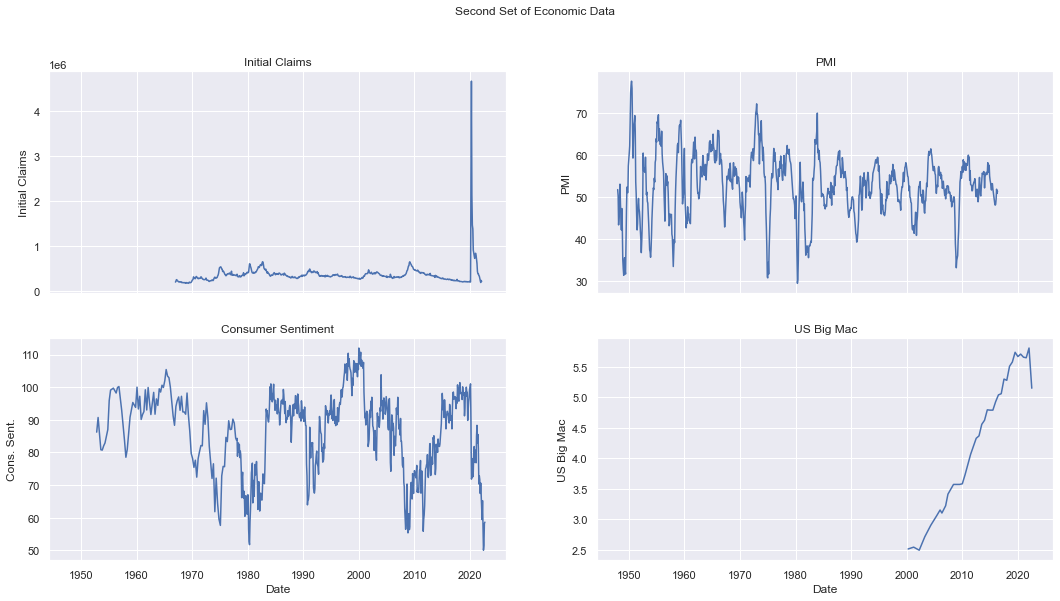

In [18]:
figure, axes = plt.subplots(2, 2, sharex=True, figsize=(18,9))
figure.suptitle('Second Set of Economic Data')

sns.lineplot(ax=axes[0, 0], data=df_merged, x='Date', y='Initial Claims').set(title='Initial Claims')
sns.lineplot(ax=axes[0, 1], data=df_merged, x='Date', y='PMI').set(title='PMI')
sns.lineplot(ax=axes[1, 0], data=df_merged_2, x='Date', y='Cons. Sent.').set(title='Consumer Sentiment')
sns.lineplot(ax=axes[1, 1], data=df_merged_2, x='Date', y='US Big Mac').set(title='US Big Mac')

[Text(0.5, 1.0, 'Revolving Credit')]

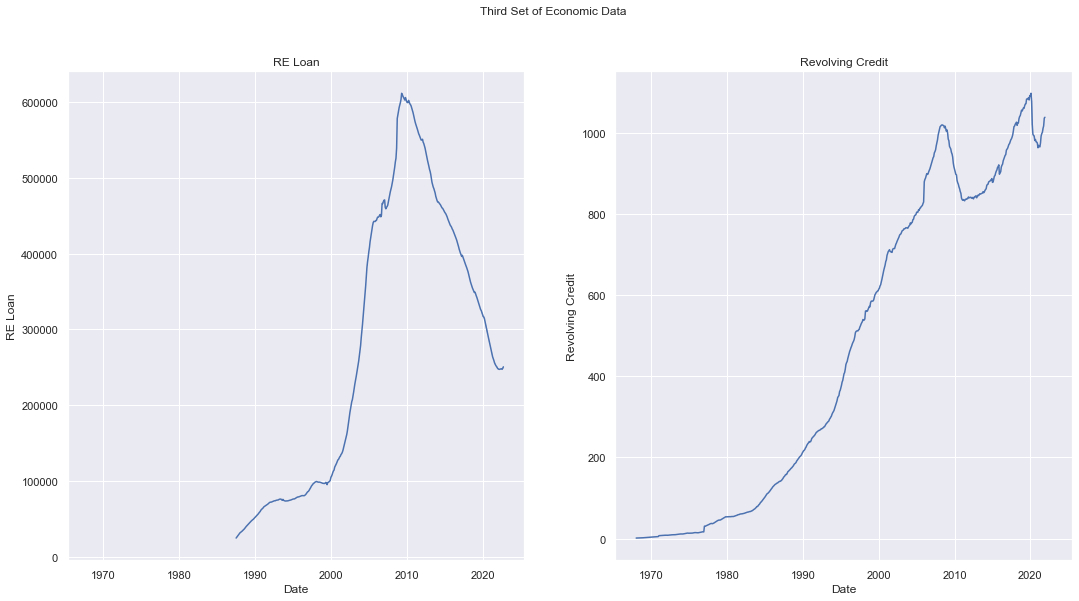

In [25]:
figure, axes = plt.subplots(1, 2, sharex=True, figsize=(18,9))
figure.suptitle('Third Set of Economic Data')

sns.lineplot(ax=axes[0], data=df_merged, x='Date', y='RE Loan').set(title='RE Loan')
sns.lineplot(ax=axes[1], data=df_merged, x='Date', y='Revolving Credit').set(title='Revolving Credit')

### Correlation matrix  

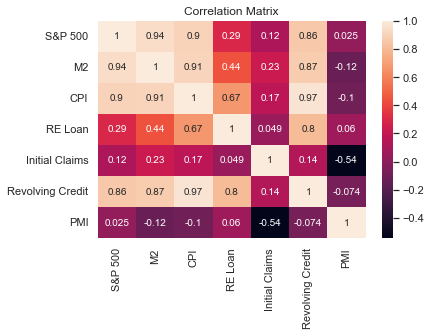

In [36]:
corr_matrix = df_merged[['S&P 500','M2','CPI', 'RE Loan','Initial Claims', 'Revolving Credit', 'PMI']].corr()
sns.heatmap(corr_matrix, annot=True).set(title='Correlation Matrix')
plt.show()

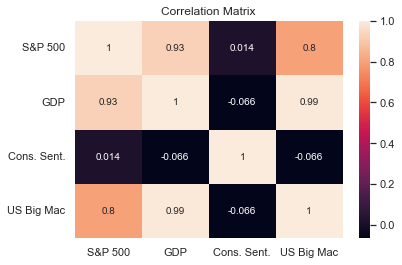

In [37]:
corr_matrix_2 = df_merged_2[['S&P 500','GDP','Cons. Sent.', 'US Big Mac']].corr()
sns.heatmap(corr_matrix_2, annot=True).set(title='Correlation Matrix')
plt.show()

In [39]:
df_merged['daily_return'] = (df_merged['S&P 500']/ df_merged['S&P 500'].shift(1)) -1
df_merged['daily_return']

0            NaN
1      -0.016452
2       0.009517
3       0.066660
4       0.049549
          ...   
1845   -0.026417
1846   -0.068796
1847    0.039165
1848    0.039165
1849   -0.004101
Name: daily_return, Length: 1850, dtype: float64

In [53]:
df = pd.DataFrame(df_merged['daily_return']) 
df

,daily_return
0,NaN
1,-0.016452
2,0.009517
3,0.066660
4,0.049549
...,...
1845,-0.026417
1846,-0.068796
1847,0.039165
1848,0.039165


In [54]:
df["daily_return"] = df["daily_return"].astype(float)
df.dtypes()

TypeError: 'Series' object is not callable

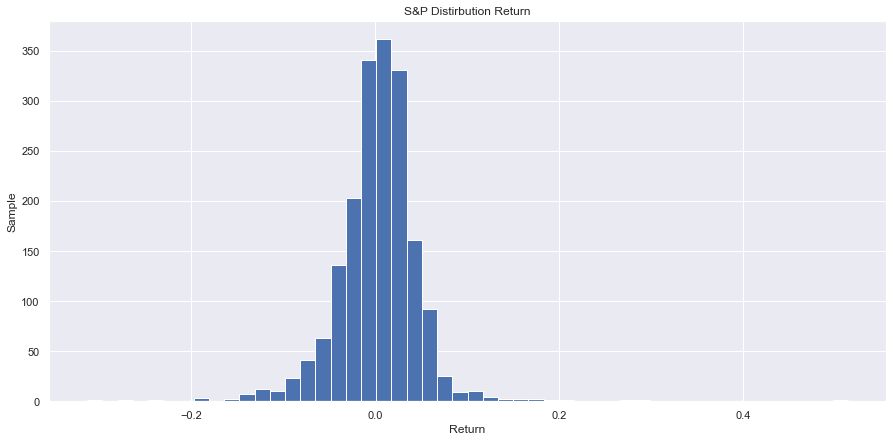

In [41]:
%matplotlib inline
fig = plt.figure(figsize=(15, 7))
ax1 = fig.add_subplot(1, 1, 1)
df_merged['daily_return'].hist(bins=50, ax=ax1)
ax1.set_xlabel('Return')
ax1.set_ylabel('Sample')
ax1.set_title('S&P Distirbution Return')
plt.show()

In [47]:
def pos(col): 
  return col[col > 0].sum()

def neg(col): 
  return col[col < 0].sum()

In [51]:
d = df.groupby(df['daily_return'])


In [52]:
print(df['daily_return'].agg([('negative_values', neg),
                          ('positive_values', pos)
                          ]))

AttributeError: 'negative_values' is not a valid function for 'Series' object